In [1]:
# https://xcitech.github.io/tutorials/heroku_tutorial/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:

df = pd.read_csv('mldata_clean.csv', encoding='latin-1')

In [3]:
df.columns

Index(['GeoID', 'Year', 'D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp',
       'G_Pay'],
      dtype='object')

In [4]:
df.dtypes

GeoID     int64
Year      int64
D_Etab    int64
D_Emp     int64
D_Pay     int64
G_Etab    int64
G_Emp     int64
G_Pay     int64
dtype: object

In [5]:
# Drop empty values and convert data to integer
df = df.dropna(how='any')
df = df.iloc[:, 2:] # Take only column 2 and after. Drop GeoID and Year columns
df.head()

,D_Etab,D_Emp,D_Pay,G_Etab,G_Emp,G_Pay
0,23,195,2189,25,913,13355
1,98,940,12949,162,7238,116756
2,53,454,5614,38,2327,37914
3,12,80,1150,11,306,5385
4,28,217,2738,16,1031,19205


In [6]:
# df.describe()

In [7]:
# df.corr()

In [8]:
# df.plot(x='G_Etab', y='D_Etab', style='o')  
# plt.title('Grocery Stores vs Dollar Stores')  
# plt.xlabel('Grocery Stores')  
# plt.ylabel('Dollar Stores')

# plt.figure(figsize=(20,10))
# plt.tight_layout()
# plt.show()

### Train model & Set Target


In [9]:
df.columns

Index(['D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp', 'G_Pay'], dtype='object')

In [10]:
X = df.drop("G_Etab", axis=1) # drop target feature column
y = df["G_Etab"]
print(X.shape, y.shape)

(11607, 5) (11607,)


In [11]:
from sklearn.datasets import make_regression

n_features = 5
n_samples = len(df)
X, y = make_regression(n_samples=n_samples, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape, y.shape)

(11607, 5) (11607,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [13]:
X_train

array([[ 1.16911804,  0.48103681,  1.11373751, -2.26554779,  0.12621847],
       [-0.0262962 ,  0.48105572, -0.43407382, -1.3844356 , -0.94353212],
       [ 1.51877501, -0.27473949,  1.5660521 , -0.18634386, -1.00255504],
       ...,
       [-1.18062605,  0.33952995,  0.9412564 , -1.04408594,  0.32800972],
       [-0.68211466,  0.81219644,  0.70361328,  0.31492847,  1.00175343],
       [ 0.73833686,  0.34081639,  1.81122139,  0.98691519,  0.34430983]])

### Make pipeline

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.externals import joblib

### Scale data

In [15]:
# Min Max Scaler

from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Robust Scaler
# https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

# from sklearn.preprocessing import RobustScaler
# robust = RobustScaler(quantile_range = (0.1,0.9))
# robust.fit_transform(X_train.f3.values.reshape(-1, 1))

In [17]:
# # Standard Scaler: Less sensitive to outliers
# https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-II-Datasets-Partitioning-Feature-scaling-Feature-Selection-Regularization.php

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
print(len(X_train_std))
print(len(X_test_std))

7776
3831


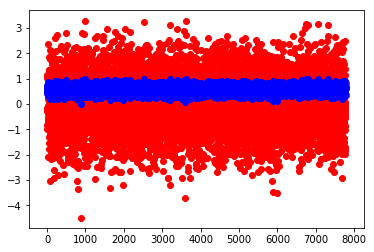

In [19]:
xx = np.arange(len(X_train_std))
yy1 = X_train_scaled[:,1] # Overfitted
yy2 = X_train_std[:,1]
plt.scatter(xx, yy2, color='r')
plt.scatter(xx, yy1, color='b')


## Machine Learning

In [20]:
# Used example of Example 21.1.2 Stu_LSD
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
model.fit(X_train_std, y_train)
training_score = model.score(X_train_std, y_train)
testing_score = model.score(X_test_std, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9999588068855109
Testing Score: 0.9999598214402481


In [22]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

# 'D_Etab', 'D_Emp', 'D_Pay', 'G_Emp','G_Pay'


Weight coefficients:  [18.78122858 37.06040694 40.6599372  44.2097494  25.10480972]
y-axis intercept:  99.58760805243546


In [23]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[-4.46560386]]
Max X Value: [[4.47908425]]


Text(0.5, 1.0, 'Residual Plot')

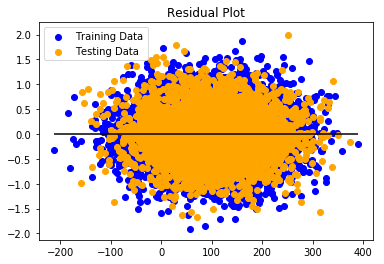

In [24]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train_std), model.predict(X_train_std) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_std), model.predict(X_test_std) - y_test, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [25]:
predictions=model.predict(X_test_std)
print(len(predictions))

3831


In [26]:
check_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(len(check_df))
check_df.head()

3831


,Actual,Predicted
0,35.990246,36.111389
1,51.390077,51.338260
2,181.572043,181.546337
3,75.282145,75.382673
4,-56.855818,-56.886347


In [27]:
# Evaluate performance of algorithm with error margins
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.39624318424275856
Mean Squared Error: 0.2454567440245188
Root Mean Squared Error: 0.49543591313561314


### In a Pickle 🥒

In [41]:
import pickle

In [42]:
filename='Regressor_model.sav'

In [44]:
pickle.dump(model, open(filename, 'wb'))

In [45]:
load_lr_model =pickle.load(open(filename, 'rb'))

In [46]:
load_lr_model.coef_

array([18.78122858, 37.06040694, 40.6599372 , 44.2097494 , 25.10480972])

In [47]:
y_load_predit=load_lr_model.predict(X_test)

In [48]:
from sklearn.externals import joblib

In [50]:
joblib.dump(model, 'reg_1.sav')

['reg_1.sav']

In [51]:
joblib_model= joblib.load('reg_1.sav')

In [53]:
import json
model_param = {}
model_param['coef'] = list(model.coef_)
model_param['intercept'] = model.intercept_.tolist()

In [54]:
json_txt = json.dumps(model_param, indent=4)


In [55]:
with open('regressor_param.txt', 'w') as file:
    file.write(json_txt)

In [56]:
with open('regressor_param.txt', 'r') as file:
    json_text=json.load(file)
json_text

{'coef': [18.78122858493666,
  37.06040693996107,
  40.65993719697674,
  44.20974940210672,
  25.104809720725726],
 'intercept': 99.58760805243546}

In [57]:
# Create the GridSearchCV model (Cross Value model)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10], # how many times run
              'gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid, verbose=3)

### Make Predictions 

In [28]:
nn_predict = model.predict(X)

In [29]:
nn_predict

array([129.56516918, 185.67376831,  89.36202749, ...,  67.70346513,
        33.01484532, 108.74585975])

In [30]:
nn_df = pd.DataFrame({'New':nn_predict})

In [31]:
nn_df.head()

,New
0,129.565169
1,185.673768
2,89.362027
3,64.634046
4,103.600181


In [ ]:
# https://machinelearningmastery.com/make-predictions-scikit-learn/

In [ ]:
X, y = make_regression(n_samples=11607, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)

In [ ]:
Xnew, _ = make_regression(
    n_samples=11607, n_features=n_features, noise=0.5, random_state=42)
print(X.shape, y.shape)

In [ ]:

new_predictions = model.predict(Xnew)

In [ ]:
new_df = pd.DataFrame({'New':new_predictions})

In [ ]:
new_df.head()

In [ ]:
xfit = np.linspace(-1,11)

In [ ]:
Xfit = xfit[:, np.]

In [ ]:
# check_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'New':new_predictions})

In [ ]:
# check_df.head()

### More prediction test

In [ ]:
# https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/

In [ ]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
 

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [ ]:
series = Series.from_csv('mldata_clean.csv')
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

In [33]:
# Make pipline
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_std, y_train)
joblib.dump(pipe, 'model.pkl')

['model.pkl']

In [34]:
#Loading the saved model with joblib
pipe = joblib.load('model.pkl')

In [39]:
# New data to predict
pr = pd.read_csv('mldata_clean.csv')
pred_cols = list(pr.columns.values)[:-1]

In [40]:
# apply the whole pipeline to data
pred = pd.Series(pipe.predict(pr[pred_cols]))
print(pred)

/Users/bic/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


ValueError: operands could not be broadcast together with shapes (11607,7) (5,) (11607,7) 